In [1]:
%matplotlib inline


# Generalized Linear Model


## Poisson Regression
Poisson Regression involves regression models in which the response variable is in the form of counts.
For example, the count of number of car accidents or number of customers in line at a reception desk.
The response variables is assumed to follow a Poisson distribution.

The general mathematical equation for Poisson regression is

\begin{align}\log(E(y)) = \beta_0 + \beta_1 X_1+\beta_2 X_2+\dots+\beta_p X_p.\end{align}

With $n$ independent data of the explanatory variables $x$ and the response variable $y$, we can estimate $\beta$ by minimizing the negative log-likelihood function under sparsity constraint:
$$
\arg \min _{\beta \in R^p} L(\beta):=-\frac{1}{n} \sum_{i=1}^n\left\{y_i x_i^T \beta-\exp \left(x_i^T \beta\right)-\log  \left(y!\right)\right\}, \text { s.t. }\|\beta\|_0 \leq s .
$$

Here is Python code for solving sparse poisson regression problem:

In [2]:
import numpy as np
from abess.datasets import make_glm_data
import jax.numpy as jnp
from scope import ScopeSolver
np.random.seed(1)

n = 500
p = 10
s = 3
data = make_glm_data(n=n, p=p, k=s, family="poisson")
X = data.x
y = data.y
# Define function to calculate negative log-likelihood of poisson regression
def poisson_loss(params):
    xbeta = jnp.clip(X @ params, -30, 30)
    return jnp.mean(jnp.exp(xbeta) - y * xbeta) #omit \log y! term


solver = ScopeSolver(p, s)
solver.solve(poisson_loss, jit=True)

print("True support set: ", np.nonzero(data.coef_)[0])
print("True parameters: ", data.coef_)
print("True loss value: ", poisson_loss(data.coef_))
print("Estimated support set: ", np.sort(solver.support_set))
print("Estimated parameters: ", solver.params)
print("Estimated loss value: ", poisson_loss(solver.params))

True support set:  [1 2 7]
True parameters:  [0.         1.84909247 3.83197678 0.         0.         0.
 0.         3.29232187 0.         0.        ]
True loss value:  0.9447799
Estimated support set:  [1 2 7]
Estimated parameters:  [0.         1.95690177 3.72724606 0.         0.         0.
 0.         2.69174586 0.         0.        ]
Estimated loss value:  0.94397926


## More on the results

<StemContainer object of 3 artists>

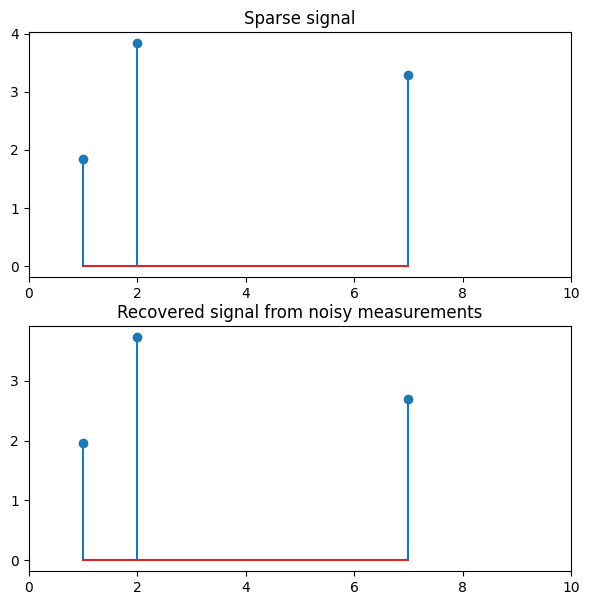

In [3]:
import matplotlib.pyplot as plt
(inx_true,) =  data.coef_.nonzero()
(inx_est,) =  solver.params.nonzero()

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(2, 1, 1)
plt.xlim(0, 10)
plt.title("Sparse signal")
plt.stem(inx_true, data.coef_[inx_true])

# plot the noisy reconstruction
plt.subplot(2, 1, 2)
plt.xlim(0, 10)
plt.title("Recovered signal from noisy measurements")
plt.stem(inx_est, solver.params[inx_est])